In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\shubh\Downloads\archive (21)\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
#splitting the data
x=df.iloc[:,1:]
x.head(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [7]:
#scalling the data 
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [8]:
x_sc

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [10]:
x_sc=pd.DataFrame(x_sc,columns=x.columns)
x_sc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
from sklearn.cluster import KMeans

wcss 
 [1503.0000000000002, 1063.4825600467796, 831.5351582151586, 722.5976818754141, 728.9396282442367, 599.2637874634478, 543.0315389214531, 475.13349109381454, 470.22938888423096]


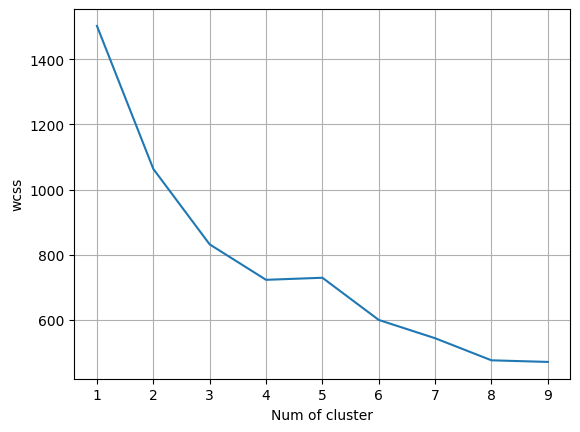

In [13]:
#finding the optimal value of K using Elbow method

wcss=[]

for i in range(1,10):
    model=KMeans(n_clusters=i)
    model.fit(x_sc)
    wcss.append(model.inertia_)

print('wcss \n', wcss)

plt.plot(list(range(1,10)),wcss)
plt.xlabel('Num of cluster')
plt.ylabel('wcss')
plt.grid()
plt.show()

As observed from above plot. Optimal value of K is 5

In [14]:
#applying kmeans at k=5
k5=KMeans(n_clusters=5)
k5.fit(x_sc)

KMeans(n_clusters=5)

In [17]:
ypred_k5=k5.predict(x_sc)
ypred_k5

array([0, 1, 4, 0, 4, 1, 4, 3, 3, 4, 1, 4, 4, 1, 4, 3, 4, 0, 4, 4, 1, 4,
       1, 3, 4, 0, 0, 4, 0, 3, 4, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 1,
       3, 1, 1, 4, 4, 0, 0, 4, 4, 3, 3, 0, 0, 1, 3, 0, 1, 4, 4, 0, 0, 4,
       0, 4, 3, 4, 4, 1, 0, 3, 1, 3, 4, 3, 4, 4, 0, 0, 3, 4, 0, 4, 1, 0,
       0, 4, 4, 2, 4, 0, 0, 4, 4, 0, 2, 0, 4, 4, 4, 4, 1, 4, 0, 0, 4, 4,
       3, 3, 0, 0, 3, 4, 0, 4, 4, 1, 4, 1, 1, 3, 1, 1, 0, 4, 1, 0, 1, 4,
       0, 2, 4, 3, 4, 0, 1, 3, 4, 4, 0, 4, 3, 3, 4, 0, 4, 0, 0, 4, 4, 1,
       4, 0, 4, 3, 3, 3, 1, 4, 4, 1, 4, 0, 0])

In [19]:
#generating the cluster centroids
cent5=k5.cluster_centers_
print(cent5)

[[ 1.38663566 -0.48696133 -0.20933948 -0.25189906 -0.7028392   0.41568288
  -1.2569573   1.37845544 -0.61450854]
 [-0.63514223 -0.34144237  0.31053826 -0.45786581  0.05695376 -0.08859193
   0.66969559 -0.69540266 -0.04921361]
 [-0.84900324  4.93567278 -0.00816303  4.54805768  2.4395424  -0.50420614
   1.22682431 -1.03886271  2.44079735]
 [-0.82543988  0.23863291  0.87063114 -0.27765482  1.5925463  -0.46095291
   1.10681057 -0.76237334  1.81183   ]
 [-0.32930138  0.19628624 -0.37063919  0.31731228 -0.29770154 -0.0471749
   0.07544139 -0.31005202 -0.40388454]]


In [18]:
df['Cluster_5']=ypred_k5
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_5
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,4
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4


In [20]:
df['Cluster_5'].value_counts()

Cluster_5
4    61
0    46
1    31
3    26
2     3
Name: count, dtype: int64

In [21]:
df[['Cluster_5','country']].sort_values(by='Cluster_5')


,Cluster_5,country
0,0,Afghanistan
87,0,Lesotho
84,0,Lao
165,0,Yemen
81,0,Kiribati
...,...,...
18,4,Bhutan
92,4,"Macedonia, FYR"
90,4,Lithuania
120,4,Philippines


In [25]:
df.groupby(['Cluster_5'])[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']].mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster_5,,,,,,,,,
0,94.023913,27.800413,6.242391,40.810128,3635.934783,12.162717,59.410870,5.028478,1734.782609
1,12.732258,31.777419,7.666129,35.838710,18239.354839,6.848161,76.493548,1.898387,12064.838710
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,5.080769,47.630769,9.200000,40.188462,47753.846154,2.923846,80.369231,1.797308,46073.076923
4,25.029508,46.473443,5.800656,54.549180,11422.786885,7.284656,71.224590,2.480000,5583.672131
